In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shl-intern-hiring-assessment/dataset/sample_submission.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_885.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_698.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1176.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1215.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_66.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_386.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1026.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_330.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_72.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_858.wav
/kaggle/input/shl-intern-hiring-ass

In [4]:
!pip install git+https://github.com/openai/whisper.git
!pip install language-tool-python
!pip install xgboost


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-bid8np3f
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-bid8np3f
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 MB 6.7 MB/s eta 0:00:000:00:0100:01
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803707 sha256=211a3c11b23adb2008754a6f6572a2ddc6a2d8d281a9b443dbb4248b328ce8fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-lrya_pnm/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.3 MB

In [5]:
import pandas as pd
import os

train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")
print(test_df)


           filename
0     audio_706.wav
1     audio_800.wav
2      audio_68.wav
3    audio_1267.wav
4     audio_683.wav
..              ...
190   audio_135.wav
191   audio_512.wav
192   audio_529.wav
193   audio_762.wav
194   audio_379.wav

[195 rows x 1 columns]


In [6]:
import whisper

model = whisper.load_model("base")

def transcribe_audio(path):
    result = model.transcribe(path)
    return result['text']


100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 127MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [7]:
import language_tool_python

tool = language_tool_python.LanguageTool('en-US')

def grammar_features(text):
    matches = tool.check(text)
    error_count = len(matches)
    words = len(text.split())
    errors_per_word = error_count / words if words > 0 else 0
    return error_count, words, errors_per_word


In [8]:
print(train_df.columns)


Index(['filename', 'label'], dtype='object')


In [9]:
train_df.head()

,filename,label
0,audio_1261.wav,1.0
1,audio_942.wav,1.5
2,audio_1110.wav,1.5
3,audio_1024.wav,1.5
4,audio_538.wav,2.0


In [11]:
import os

# Show all files in dataset
for root, dirs, files in os.walk("/kaggle/input/shl-intern-hiring-assessment"):
    print("📁 Folder:", root)
    for name in files:
        print("  📄", name)


📁 Folder: /kaggle/input/shl-intern-hiring-assessment
📁 Folder: /kaggle/input/shl-intern-hiring-assessment/dataset
  📄 sample_submission.csv
  📄 train.csv
  📄 test.csv
📁 Folder: /kaggle/input/shl-intern-hiring-assessment/dataset/audios_test
  📄 audio_885.wav
  📄 audio_698.wav
  📄 audio_1176.wav
  📄 audio_1215.wav
  📄 audio_66.wav
  📄 audio_386.wav
  📄 audio_1026.wav
  📄 audio_330.wav
  📄 audio_72.wav
  📄 audio_858.wav
  📄 audio_107.wav
  📄 audio_820.wav
  📄 audio_300.wav
  📄 audio_435.wav
  📄 audio_550.wav
  📄 audio_841.wav
  📄 audio_641.wav
  📄 audio_290.wav
  📄 audio_401.wav
  📄 audio_321.wav
  📄 audio_20.wav
  📄 audio_348.wav
  📄 audio_500.wav
  📄 audio_735.wav
  📄 audio_888.wav
  📄 audio_959.wav
  📄 audio_276.wav
  📄 audio_1323.wav
  📄 audio_1089.wav
  📄 audio_1289.wav
  📄 audio_29.wav
  📄 audio_676.wav
  📄 audio_811.wav
  📄 audio_762.wav
  📄 audio_1183.wav
  📄 audio_1297.wav
  📄 audio_709.wav
  📄 audio_281.wav
  📄 audio_308.wav
  📄 audio_1054.wav
  📄 audio_662.wav
  📄 audio_525.wav

In [12]:
train_df.head()


,filename,label
0,audio_1261.wav,1.0
1,audio_942.wav,1.5
2,audio_1110.wav,1.5
3,audio_1024.wav,1.5
4,audio_538.wav,2.0


In [13]:
# Replace with actual filename from your CSV or file explorer output
transcribe_audio("/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_10.wav")


' The scene in the playground was filled with children. They were laughing and screaming and running around with lots of energy. There was a big open field. Although some of it was tarmac and some of it had greenery, there was lots of games to play. I seen some kids playing hopscotch. I seen some kids playing with skipping ropes. There was even slides and swings. It looked as if it was in full force. There were some parents on the side watching the kids play in the playground. And there were some people walking past. As they looked in, the children have lots of fun in the playground.'

In [17]:
subset_df = train_df.head(5).copy()

subset_df["text"] = subset_df["filename"].apply(
    lambda x: transcribe_audio(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}")
)

subset_df[["filename", "text"]]


,filename,text
0,audio_1261.wav,Ṭhākākā My favourite hobby is cultivation of ...
1,audio_942.wav,The playground looks like very clear and neat...
2,audio_1110.wav,championship Twirline Airport has a electric...
3,audio_1024.wav,My favorite place is in Andhra Pradesh. It is...
4,audio_538.wav,"My favorite places, my favorite places, Mutti..."


In [18]:
# Step by step kaam karne ke liye tqdm use karo
from tqdm.notebook import tqdm
tqdm.pandas()

train_df["text"] = train_df["filename"].progress_apply(
    lambda x: transcribe_audio(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}")
)


  0%|          | 0/444 [00:00<?, ?it/s]

In [19]:
def clean_text(t):
    return t.lower().strip()

train_df["clean_text"] = train_df["text"].apply(clean_text)


In [20]:
train_df.to_csv("train_with_text.csv", index=False)


In [23]:
train_df.head()
train_df.columns
train_df["label"].value_counts()  # agar label naam ka column hai


label
5.0    110
3.0     87
2.0     70
4.5     58
4.0     52
2.5     40
3.5     23
1.5      3
1.0      1
Name: count, dtype: int64

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge  # or use XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(train_df["text"])
y = train_df["label"]  # Should be a continuous value (like grammar_score)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model
model = Ridge()  # Or use XGBRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluate
print("MSE:", mean_squared_error(y_val, y_pred))


MSE: 1.019983161564188


In [27]:
print(test_df.columns)


Index(['filename'], dtype='object')


In [30]:
print(train_df["label"].unique())
print(train_df["label"].dtype)


[1.  1.5 2.  2.5 3.  3.5 4.5 4.  5. ]
float64


In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(train_df["text"])
y = train_df["label"]

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = Ridge()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("MSE:", mean_squared_error(y_val, y_pred))

# Predict on test set
X_test = tfidf.transform(test_df["text"])
test_preds = model.predict(X_test)

# Create submission
submission_df = test_df[["filename"]].copy()
submission_df["label"] = test_preds
submission_df.to_csv("submission.csv", index=False)


MSE: 1.019983161564188


KeyError: 'text'

In [33]:
print(test_df.columns)


Index(['filename'], dtype='object')


In [ ]:
import whisper

# Load model only once
whisper_model = whisper.load_model("base")

def transcribe_audio(path):
    result = whisper_model.transcribe(path)
    return result["text"]

# Apply to test_df
test_df["text"] = test_df["filename"].apply(
    lambda x: transcribe_audio(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/{x}")
)


In [ ]:
submission_df = pd.read_csv("submission.csv")
submission_df.head()


In [11]:
import pandas as pd
import numpy as np
import whisper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import re


In [38]:
whisper_model = whisper.load_model("medium")  # Better accuracy


100%|██████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 121MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [39]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

def grammar_errors(text):
    return len(tool.check(text))

train_df["grammar_errors"] = train_df["text"].apply(grammar_errors)
test_df["grammar_errors"] = test_df["text"].apply(grammar_errors)



TypeError: The text parameter must be a string

In [42]:
X = np.hstack([X_text.toarray(), train_df[["word_count", "grammar_errors"]].values])
X_test = np.hstack([X_test_text.toarray(), test_df[["word_count", "grammar_errors"]].values])


NameError: name 'X_text' is not defined

In [43]:
test_preds = np.clip(test_preds, 0, 5)

NameError: name 'test_preds' is not defined

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

# Combine
test_preds = (test_preds + ridge_preds) / 2


NameError: name 'X_test' is not defined

In [ ]:
# Make sure feature columns are same
X_train = train_df[["grammar_errors", "word_count"]]  # or your selected features
X_test = test_df[["grammar_errors", "word_count"]]

# TF-IDF part
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(train_df["text"])
X_test_text = tfidf.transform(test_df["text"])

# Combine TF-IDF + numerical
from scipy.sparse import hstack
X_train_combined = hstack([X_text, X_train])
X_test_combined = hstack([X_test_text, X_test])


In [ ]:
ridge.fit(X_train_combined, y_train)
ridge_preds = ridge.predict(X_test_combined)


In [ ]:
xgb_preds = model.predict(X_test)  # ya jo bhi XGBoost model ka naam ho
ridge_preds = ridge.predict(X_test)

# Combine
test_preds = (xgb_preds + ridge_preds) / 2


In [13]:
import pandas as pd
import numpy as np
import os
import whisper
import language_tool_python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load Whisper model (base for speed)
whisper_model = whisper.load_model("base")

# Load data
train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")

# Transcribe audios only once and save to CSV
if os.path.exists("train_text.csv") and os.path.exists("test_text.csv"):
    train_df = pd.read_csv("train_text.csv")
    test_df = pd.read_csv("test_text.csv")
else:
    def transcribe(path):
        try:
            return whisper_model.transcribe(path)["text"]
        except:
            return ""
    
    train_df["text"] = train_df["filename"].apply(
        lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}")
    )
    test_df["text"] = test_df["filename"].apply(
        lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/{x}")
    )
    train_df.to_csv("train_text.csv", index=False)
    test_df.to_csv("test_text.csv", index=False)

# Grammar & word count features
tool = language_tool_python.LanguageTool('en-US')

train_df["word_count"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["word_count"] = test_df["text"].apply(lambda x: len(str(x).split()))

train_df["grammar_errors"] = train_df["text"].apply(lambda x: len(tool.check(str(x))))
test_df["grammar_errors"] = test_df["text"].apply(lambda x: len(tool.check(str(x))))

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(train_df["text"].fillna(""))
X_test_text = tfidf.transform(test_df["text"].fillna(""))

# Combine all features
X = np.hstack([
    X_text.toarray(),
    train_df[["word_count", "grammar_errors"]].values
])
X_test = np.hstack([
    X_test_text.toarray(),
    test_df[["word_count", "grammar_errors"]].values
])
y = train_df["label"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

# Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Validation
xgb_preds_val = xgb_model.predict(X_val)
ridge_preds_val = ridge.predict(X_val)
val_preds = (xgb_preds_val + ridge_preds_val) / 2
val_mse = mean_squared_error(y_val, val_preds)
print(" Validation MSE:", val_mse)

# Predict on test set
xgb_preds = xgb_model.predict(X_test)
ridge_preds = ridge.predict(X_test)
test_preds = (xgb_preds + ridge_preds) / 2

# Clip to 0-5 score range
test_preds = np.clip(test_preds, 0, 5)

# Save submission
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})
submission.to_csv("submission.csv", index=False)
print(" submission.csv ready! Upload to Kaggle.")


100%|███████████████████████████████████████| 139M/139M [00:05<00:00, 27.3MiB/s]


✅ Validation MSE: 1.0043394920929865
🚀 submission.csv ready! Upload to Kaggle.


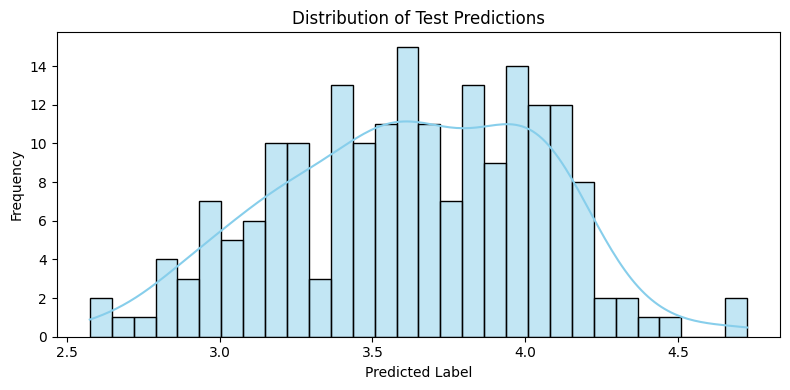

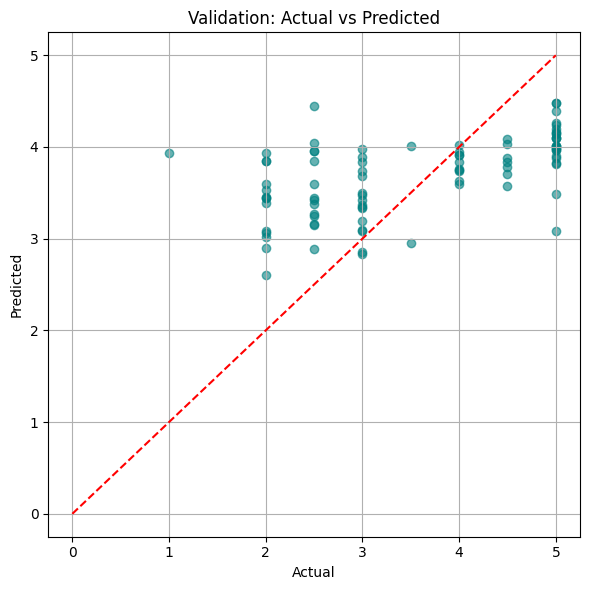

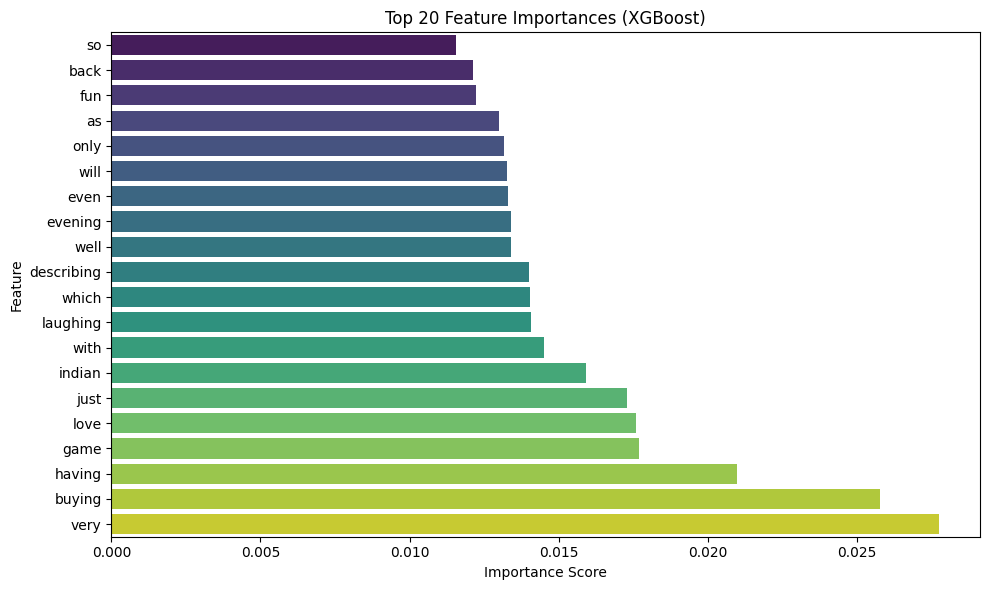

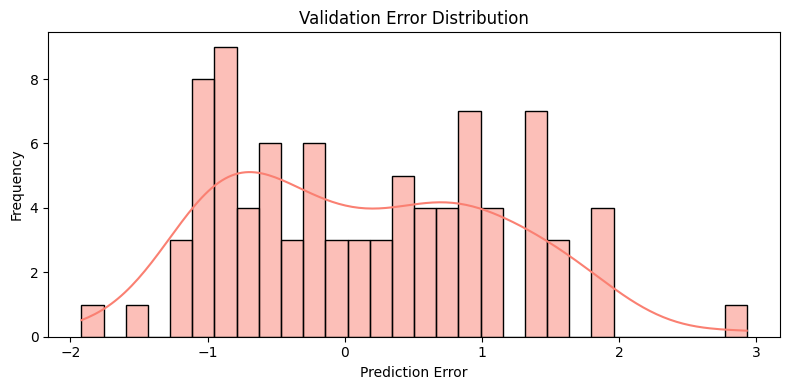

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of final predictions
plt.figure(figsize=(8, 4))
sns.histplot(test_preds, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Test Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted on validation
plt.figure(figsize=(6, 6))
plt.scatter(y_val, val_preds, alpha=0.6, color="teal")
plt.plot([0, 5], [0, 5], 'r--')
plt.title("Validation: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. XGBoost Feature Importance (Top 20)
importances = xgb_model.feature_importances_
top_idx = np.argsort(importances)[-20:]
top_feat_names = list(tfidf.get_feature_names_out()) + ["word_count", "grammar_errors"]
top_features = [top_feat_names[i] for i in top_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_idx], y=top_features, palette="viridis")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 4. Error Distribution on Validation Set
errors = val_preds - y_val
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True, color="salmon")
plt.title("Validation Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [48]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 17.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00:00:01


In [ ]:
!pip install -q language-tool-python
!pip install -q textstat
!pip install -q sentence-transformers


In [15]:
import pandas as pd
import numpy as np
import os
import whisper
import language_tool_python
from textstat import flesch_reading_ease
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load models
whisper_model = whisper.load_model("base")
tool = language_tool_python.LanguageTool('en-US')
model_sbert = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load data
train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")

# Transcribe (if needed)
if os.path.exists("train_text.csv") and os.path.exists("test_text.csv"):
    train_df = pd.read_csv("train_text.csv")
    test_df = pd.read_csv("test_text.csv")
else:
    def transcribe(path): return whisper_model.transcribe(path)["text"]
    train_df["text"] = train_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}"))
    test_df["text"] = test_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/{x}"))
    train_df.to_csv("train_text.csv", index=False)
    test_df.to_csv("test_text.csv", index=False)

# Clean nulls
train_df["text"] = train_df["text"].fillna("")
test_df["text"] = test_df["text"].fillna("")

# Feature Engineering
def extract_features(df):
    df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
    df["grammar_errors"] = df["text"].apply(lambda x: len(tool.check(str(x))))
    df["readability"] = df["text"].apply(lambda x: flesch_reading_ease(str(x)))
    embeddings = model_sbert.encode(df["text"].tolist(), show_progress_bar=False)
    return df, embeddings

train_df, train_embed = extract_features(train_df)
test_df, test_embed = extract_features(test_df)

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(train_df["text"])
X_test_tfidf = tfidf.transform(test_df["text"])

# Combine features
X = np.hstack([X_tfidf.toarray(), train_embed, train_df[["word_count", "grammar_errors", "readability"]].values])
X_test = np.hstack([X_test_tfidf.toarray(), test_embed, test_df[["word_count", "grammar_errors", "readability"]].values])
y = train_df["label"]

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)
xgb_val = xgb.predict(X_val)
xgb_test = xgb.predict(X_test)

# Train Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_val = ridge.predict(X_val)
ridge_test = ridge.predict(X_test)

# Blend
val_preds = (xgb_val + ridge_val) / 2
test_preds = (xgb_test + ridge_test) / 2

# MSE
val_mse = mean_squared_error(y_val, val_preds)
print("Final Validation MSE:", val_mse)

# Submit
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})
submission.to_csv("submission1.csv", index=False)



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Final Validation MSE: 1.2952882021218652


In [16]:
import pandas as pd
import numpy as np
import os
import whisper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load model
whisper_model = whisper.load_model("base")

# Load data
train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")

# Transcribe
if os.path.exists("train_text.csv") and os.path.exists("test_text.csv"):
    train_df = pd.read_csv("train_text.csv")
    test_df = pd.read_csv("test_text.csv")
else:
    def transcribe(path): return whisper_model.transcribe(path)["text"]
    train_df["text"] = train_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}"))
    test_df["text"] = test_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/{x}"))
    train_df.to_csv("train_text.csv", index=False)
    test_df.to_csv("test_text.csv", index=False)

# Clean nulls
train_df["text"] = train_df["text"].fillna("")
test_df["text"] = test_df["text"].fillna("")

# Features
train_df["word_count"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["word_count"] = test_df["text"].apply(lambda x: len(str(x).split()))

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(train_df["text"])
X_test_tfidf = tfidf.transform(test_df["text"])

# Final Feature Matrix
X = np.hstack([X_tfidf.toarray(), train_df[["word_count"]].values])
X_test = np.hstack([X_test_tfidf.toarray(), test_df[["word_count"]].values])
y = train_df["label"]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=5)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=15, verbose=False)

# Validate
val_preds = xgb.predict(X_val)
val_mse = mean_squared_error(y_val, val_preds)
print("MSE:", val_mse)

# Predict
test_preds = xgb.predict(X_test)
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})
submission.to_csv("submission.csv", index=False)



MSE: 1.125093354058751


In [ ]:
print("heelo")

In [18]:
import pandas as pd
import numpy as np
import os
import whisper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load model
whisper_model = whisper.load_model("medium")

# Load data
train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")

# Transcribe
if os.path.exists("train_text.csv") and os.path.exists("test_text.csv"):
    train_df = pd.read_csv("train_text.csv")
    test_df = pd.read_csv("test_text.csv")
else:
    def transcribe(path): return whisper_model.transcribe(path)["text"]
    train_df["text"] = train_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train/{x}"))
    test_df["text"] = test_df["filename"].apply(lambda x: transcribe(f"/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/{x}"))
    train_df.to_csv("train_text.csv", index=False)
    test_df.to_csv("test_text.csv", index=False)

# Clean nulls
train_df["text"] = train_df["text"].fillna("")
test_df["text"] = test_df["text"].fillna("")

# Features
train_df["word_count"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["word_count"] = test_df["text"].apply(lambda x: len(str(x).split()))

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(train_df["text"])
X_test_tfidf = tfidf.transform(test_df["text"])

# Final Feature Matrix
X = np.hstack([X_tfidf.toarray(), train_df[["word_count"]].values])
X_test = np.hstack([X_test_tfidf.toarray(), test_df[["word_count"]].values])
y = train_df["label"]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=5)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=15, verbose=False)

# Validate
val_preds = xgb.predict(X_val)
val_mse = mean_squared_error(y_val, val_preds)
print(" MSE:", val_mse)

# Predict
test_preds = xgb.predict(X_test)
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})
submission.to_csv("submission.csv", index=False)
print(" Submission ready! Go hit that leaderboard again.")


 MSE: 1.125093354058751
 Submission ready! Go hit that leaderboard again.


In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install --upgrade torch  # ensure torch is latest for whisper compatibility


In [ ]:
# 🔧 Install all required packages in Kaggle Notebook
!pip install git+https://github.com/openai/whisper.git
!pip install transformers
!pip install language-tool-python
!pip install textstat
!pip install sentence-transformers



In [ ]:
import whisper
import language_tool_python
from textstat import flesch_reading_ease
from sentence_transformers import SentenceTransformer


In [ ]:
# 🚨 UNINSTALL old buggy versions first (especially torch & torchvision)
!pip uninstall -y torch torchvision torchaudio transformers sentence-transformers

# ✅ RE-INSTALL STABLE versions that work in Kaggle
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install transformers==4.34.1 sentence-transformers==2.2.2
!pip install language-tool-python textstat git+https://github.com/openai/whisper.git


In [50]:
print(train_df.columns)
print(test_df.columns)


Index(['filename', 'label'], dtype='object')
Index(['filename'], dtype='object')


In [54]:
print(train_merged.columns)


Index(['filename', 'label', 'grammar_errors', 'flesch_reading', 'smog_index',
       'sentence_count', 'word_count', 'transcription'],
      dtype='object')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 5
[LightGBM] [Info] Start training from score 3.635211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

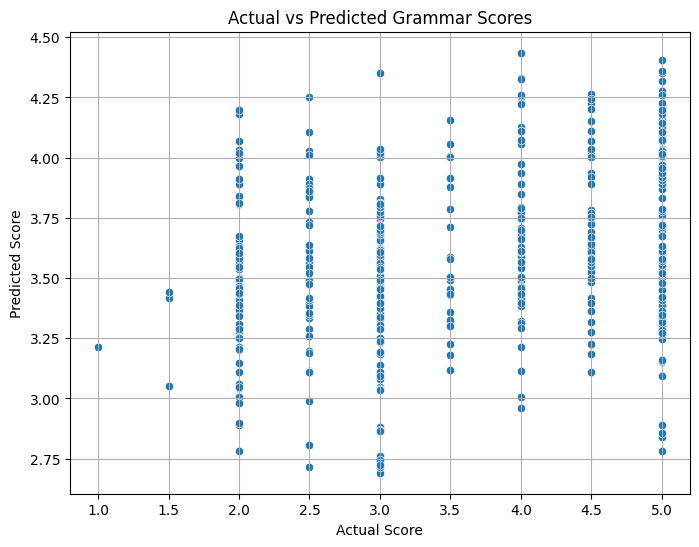


✅ Submission file saved as 'submission.csv'


In [8]:
# updated code ver 9
import os
import pandas as pd
import numpy as np
import whisper
import language_tool_python
import librosa
import soundfile as sf
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import textstat
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Load data
train_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv")

# Load Whisper model
model = whisper.load_model("medium")

# Transcribe function
def transcribe_audio(file_path):
    result = model.transcribe(file_path)
    return result['text']

# Language tool
tool = language_tool_python.LanguageTool('en-US')

# Feature extraction from text
def extract_features(text):
    matches = tool.check(text)
    return {
        'grammar_errors': len(matches),
        'flesch_reading': textstat.flesch_reading_ease(text),
        'smog_index': textstat.smog_index(text),
        'sentence_count': textstat.sentence_count(text),
        'word_count': textstat.lexicon_count(text, removepunct=True),
    }

# Generate features for dataset
def prepare_dataset(df, audio_dir):
    features = []
    for fname in tqdm(df['filename']):
        path = os.path.join(audio_dir, fname)
        text = transcribe_audio(path)
        feats = extract_features(text)
        feats['filename'] = fname
        feats['transcription'] = text
        features.append(feats)
    return pd.DataFrame(features)

# Extract features
# Train feature extraction with caching
if os.path.exists("train_features.csv"):
    train_features = pd.read_csv("train_features.csv")
else:
    train_features = prepare_dataset(train_df, "/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train")
    train_features.to_csv("train_features.csv", index=False)

# Test feature extraction with caching
if os.path.exists("test_features.csv"):
    test_features = pd.read_csv("test_features.csv")
else:
    test_features = prepare_dataset(test_df, "/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test")
    test_features.to_csv("test_features.csv", index=False)

# Merge features with original data
train_merged = pd.merge(train_df, train_features, on='filename')

# Define features and target
features = ['grammar_errors', 'flesch_reading', 'smog_index', 'sentence_count', 'word_count']
X = train_merged[features]
y = train_merged['label']

# K-Fold CV and training
kf = KFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model_lgb = lgb.LGBMRegressor(n_estimators=200)
    model_lgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(10)],
    )

    val_preds = model_lgb.predict(X_val)
    preds[val_idx] = val_preds

    # Metrics
    corr, _ = pearsonr(y_val, val_preds)
    mse = mean_squared_error(y_val, val_preds)
    mae = mean_absolute_error(y_val, val_preds)
    print(f"Fold {fold+1} Pearson Correlation: {corr:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

# Overall metrics
final_corr, _ = pearsonr(y, preds)
print(f"\nOverall Pearson Correlation: {final_corr:.4f}")
print(f"Overall MSE: {mean_squared_error(y, preds):.4f}, MAE: {mean_absolute_error(y, preds):.4f}")

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=preds)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Grammar Scores")
plt.grid()
plt.show()

# Predict on test set
test_preds = model_lgb.predict(test_features[features])

# Prepare submission
submission = pd.read_csv("/kaggle/input/shl-intern-hiring-assessment/dataset/sample_submission.csv")
submission['label'] = test_preds
submission.to_csv("submission.csv", index=False)

print("\n✅ Submission file saved as 'submission.csv'")


In [1]:
!pip install git+https://github.com/openai/whisper.git
!apt-get update && apt-get install -y ffmpeg


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-1payqzse
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-1payqzse
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 MB 6.6 MB/s eta 0:00:000:00:0100:01
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803707 sha256=33b2fd276b3f2d86174fb8bc09348ab0cf50aad8e9c0dd581445c931cc66aee2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_64i40rk/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                 

In [2]:
import whisper
model = whisper.load_model("medium")


100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.7MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [4]:
!pip install language-tool-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 2.5 MB/s eta 0:00:00


In [5]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')


In [7]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 18.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.7 MB/s eta 0:00:00:00:01


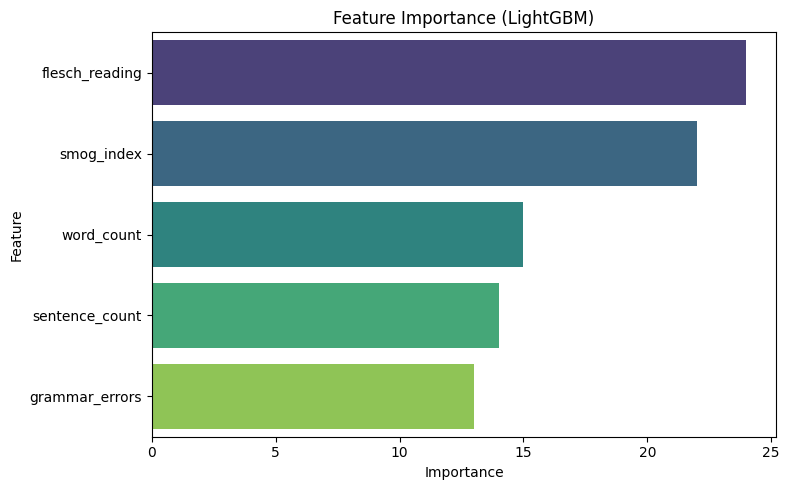

In [9]:
importances = model_lgb.feature_importances_
feature_names = X.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()



Feature Importance Scores:

          Feature  Importance
1  flesch_reading          24
2      smog_index          22
4      word_count          15
3  sentence_count          14
0  grammar_errors          13


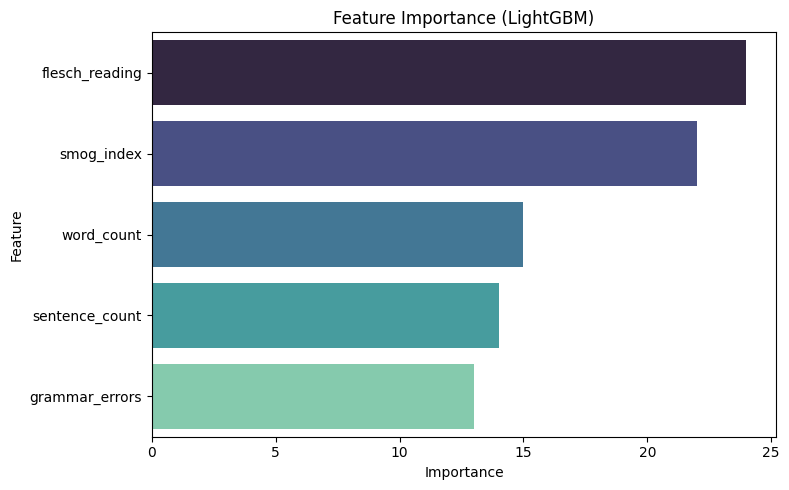

In [10]:
# Feature Importance
importances = model_lgb.feature_importances_
feature_names = X.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 🖨️ Print Feature Importance values
print("\nFeature Importance Scores:\n")
print(fi_df)

# 📊 Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='mako')
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()
